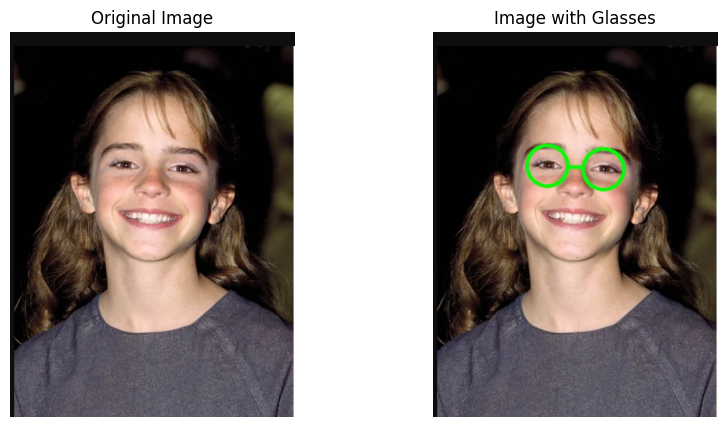

In [58]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Variant number calculation
variant_number = ord('B') % 5 + 1

# 2. Load data from lab6.xlsx
df = pd.read_excel("lab6.xlsx")

# 3. Get your variant data from the dataframe
personal_data = df.iloc[variant_number - 1]  # Adjust if indexing starts from 0

# 4. Function to add realistic glasses to an image
def add_glasses(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load Haar cascades for face and eyes
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        # Define the region of interest for the eyes
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
        
        # Detect eyes within the face and filter based on y-position to stay within eye level
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Filter to include only detections in the upper half of the face region
        eye_detections = [eye for eye in eyes if eye[1] < h // 2]

        # Draw glasses only if we detect exactly two eyes
        if len(eye_detections) >= 2:
            # Sort by x-position to ensure left-to-right order
            eye_detections = sorted(eye_detections, key=lambda e: e[0])

            # Get the centers of each eye
            left_eye = eye_detections[0]
            right_eye = eye_detections[1]
            
            # Calculate center coordinates and radius for each eye circle
            left_eye_center = (x + left_eye[0] + left_eye[2] // 2, y + left_eye[1] + left_eye[3] // 2)
            right_eye_center = (x + right_eye[0] + right_eye[2] // 2, y + right_eye[1] + right_eye[3] // 2)
            radius = max(left_eye[2] // 2, right_eye[2] // 2)  # Set radius based on larger eye width
            
            # Define glasses color and thickness
            glasses_color = (0, 255, 0)  # Green color for glasses
            thickness = 3  # Line thickness

            # Draw circles around each eye
            cv2.circle(image, left_eye_center, radius, glasses_color, thickness)
            cv2.circle(image, right_eye_center, radius, glasses_color, thickness)
            
            # Draw a line connecting the two eye circles (bridge of glasses)
            bridge_y = int((left_eye_center[1] + right_eye_center[1]) / 2)  # Bridge line at average eye height
            cv2.line(image, (left_eye_center[0] + radius, bridge_y), 
                     (right_eye_center[0] - radius, bridge_y), glasses_color, thickness)

    # Save the modified image
    output_path = "output_image_with_glasses.jpg"
    cv2.imwrite(output_path, image)
    
    return output_path

# Test the function on an image
original_image_path = "emma-watson.jpg"
output_image_path = add_glasses(original_image_path)

# Display the original and output images side by side
original_img = cv2.imread(original_image_path)
output_img = cv2.imread(output_image_path)

# Convert BGR to RGB for displaying
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_img_rgb)
plt.title("Image with Glasses")
plt.axis('off')

plt.show()
